In [6]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Load dataset

df = pd.read_csv('data/FinalDataset.csv')

# Drop uninformative columns
df = df.drop(columns=['SHA-256 Hash', 'Software Name'])

# One-hot encode 'File Type'
df = pd.get_dummies(df, columns=['File Type'], drop_first=True)

# Define features and target
X = df.drop(columns=['Fake?'])
y = df['Fake?']

# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['File Size (MB)', 'Sections', 'VirusTotal Score']
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Display results
print("Original training shape:", X_train.shape)
print("Resampled training shape:", X_train_resampled.shape)
print("Test shape:", X_test.shape)
print("\nClass distribution before SMOTE:\n", y_train.value_counts())
print("\nClass distribution after SMOTE:\n", y_train_resampled.value_counts())
print("\nFeature columns used:\n", X.columns.tolist())


Original training shape: (8000, 9)
Resampled training shape: (9922, 9)
Test shape: (2000, 9)

Class distribution before SMOTE:
 Fake?
0    4961
1    3039
Name: count, dtype: int64

Class distribution after SMOTE:
 Fake?
1    4961
0    4961
Name: count, dtype: int64

Feature columns used:
 ['File Size (MB)', 'Sections', 'Digital Signature', 'VirusTotal Score', 'Network Activity', 'Permissions Requested', 'File Type_application/x-dosexec', 'File Type_application/x-executable', 'File Type_exe']


📊 Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1236
           1       0.89      0.91      0.90       764

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000

🔢 Metrics:
Accuracy : 0.9215
Precision: 0.8886043533930857
Recall   : 0.9083769633507853
F1 Score : 0.8983818770226537


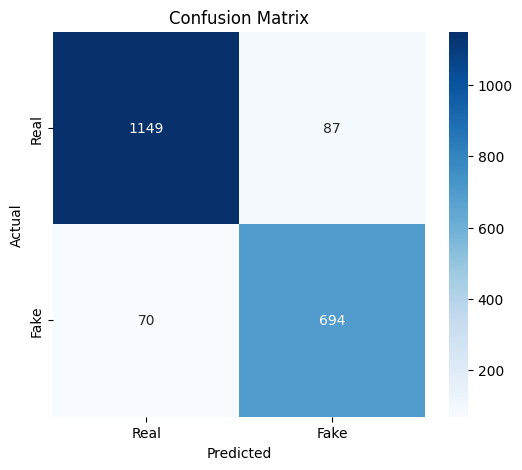

In [7]:


# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Train the model on resampled training data
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Step 2: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 3: Evaluate the model
print("📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

print("🔢 Metrics:")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

# Step 4: Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train Random Forest on SMOTE-resampled training set
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Predict on test and train data
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train_resampled)

# Calculate accuracies
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train_resampled, y_pred_train)

# Print results
print("✅ Accuracy on Resampled Training Data :", round(accuracy_train * 100, 2), "%")
print("✅ Accuracy on Original Testing Data   :", round(accuracy_test * 100, 2), "%")


✅ Accuracy on Resampled Training Data : 100.0 %
✅ Accuracy on Original Testing Data   : 92.15 %


📊 Classification Report (Test Set):

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1236
           1       0.88      0.92      0.90       764

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000

✅ Accuracy on Resampled Training Data : 93.29 %
✅ Accuracy on Original Testing Data   : 92.25 %


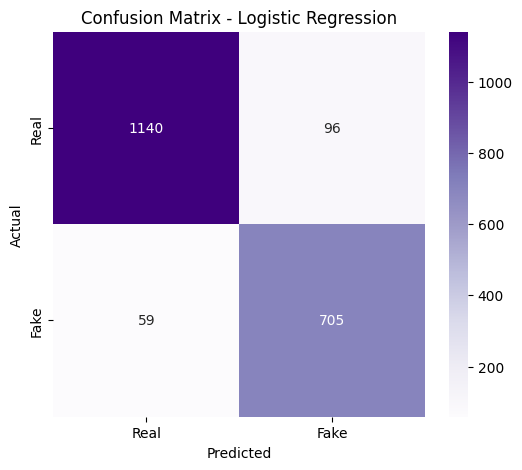

In [ ]:


# Step 2: Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Step 3: Train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_resampled, y_train_resampled)

# Step 4: Predict on test and train data
y_pred_test = log_reg.predict(X_test)
y_pred_train = log_reg.predict(X_train_resampled)

# Step 5: Calculate accuracy
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train_resampled, y_pred_train)

# Step 6: Print classification report
print("📊 Classification Report (Test Set):\n")
print(classification_report(y_test, y_pred_test))

# Step 7: Print accuracy
print("✅ Accuracy on Resampled Training Data :", round(accuracy_train * 100, 2), "%")
print("✅ Accuracy on Original Testing Data   :", round(accuracy_test * 100, 2), "%")

# Step 8: Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


📊 Classification Report (Test Set):

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1236
           1       0.88      0.90      0.89       764

    accuracy                           0.92      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.92      0.92      0.92      2000

✅ Accuracy on Resampled Training Data : 100.0 %
✅ Accuracy on Original Testing Data   : 91.5 %


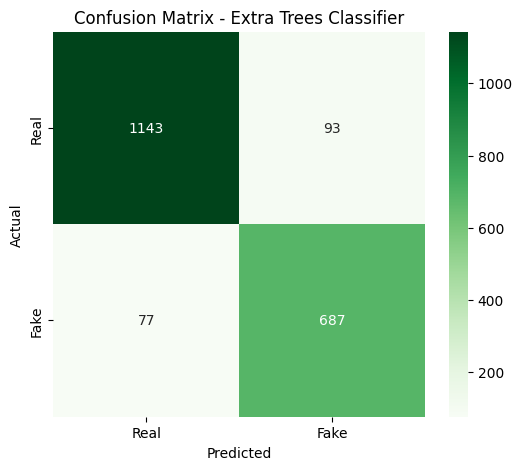

In [10]:


# Step 2: Import libraries
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 3: Train Extra Trees Classifier
et_model = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_model.fit(X_train_resampled, y_train_resampled)

# Step 4: Predictions
y_pred_test = et_model.predict(X_test)
y_pred_train = et_model.predict(X_train_resampled)

# Step 5: Accuracy Scores
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train_resampled, y_pred_train)

# Step 6: Print classification report
print("📊 Classification Report (Test Set):\n")
print(classification_report(y_test, y_pred_test))

# Step 7: Print Accuracy
print("✅ Accuracy on Resampled Training Data :", round(accuracy_train * 100, 2), "%")
print("✅ Accuracy on Original Testing Data   :", round(accuracy_test * 100, 2), "%")

# Step 8: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.title('Confusion Matrix - Extra Trees Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


c:\Users\rushy\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [23:18:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


📊 Classification Report (Test Set):

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      1236
           1       0.88      0.90      0.89       764

    accuracy                           0.92      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.92      0.92      0.92      2000

✅ Accuracy on Resampled Training Data : 99.04 %
✅ Accuracy on Original Testing Data   : 91.55 %


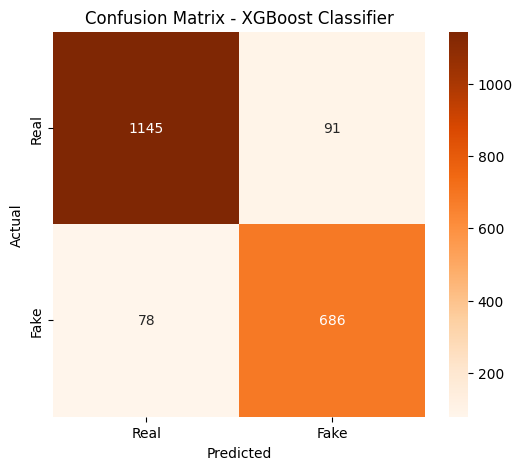

In [11]:


# Step 2: Import libraries
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Step 3: Train the XGBoost Classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

# Step 4: Make predictions
y_pred_test = xgb_model.predict(X_test)
y_pred_train = xgb_model.predict(X_train_resampled)

# Step 5: Accuracy scores
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train_resampled, y_pred_train)

# Step 6: Classification Report
print("📊 Classification Report (Test Set):\n")
print(classification_report(y_test, y_pred_test))

# Step 7: Accuracy Output
print("✅ Accuracy on Resampled Training Data :", round(accuracy_train * 100, 2), "%")
print("✅ Accuracy on Original Testing Data   :", round(accuracy_test * 100, 2), "%")

# Step 8: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.title('Confusion Matrix - XGBoost Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4961, number of negative: 4961
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 777
[LightGBM] [Info] Number of data points in the train set: 9922, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
📊 Classification Report (Test Set):

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1236
           1       0.88      0.91      0.89       764

    accuracy                           0.92      2000
   macro avg       0.91      0.92      0.91      2000
weighted avg       0.92      0.92      0.92      2000

✅ Accuracy on Resampled Training Data : 97.5 %
✅ Accuracy 

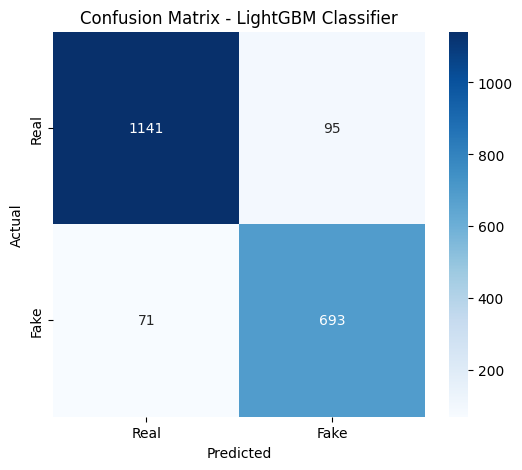

In [14]:

# Step 2: Import necessary libraries
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Step 3: Train LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train_resampled, y_train_resampled)

# Step 4: Predict on training and test sets
y_pred_test = lgb_model.predict(X_test)
y_pred_train = lgb_model.predict(X_train_resampled)

# Step 5: Accuracy metrics
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train_resampled, y_pred_train)

# Step 6: Classification report
print("📊 Classification Report (Test Set):\n")
print(classification_report(y_test, y_pred_test))

# Step 7: Accuracy results
print("✅ Accuracy on Resampled Training Data :", round(accuracy_train * 100, 2), "%")
print("✅ Accuracy on Original Testing Data   :", round(accuracy_test * 100, 2), "%")

# Step 8: Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.title('Confusion Matrix - LightGBM Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


📊 Classification Report (Test Set):

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1236
           1       0.88      0.91      0.90       764

    accuracy                           0.92      2000
   macro avg       0.91      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000

✅ Accuracy on Resampled Training Data : 93.32 %
✅ Accuracy on Original Testing Data   : 92.1 %


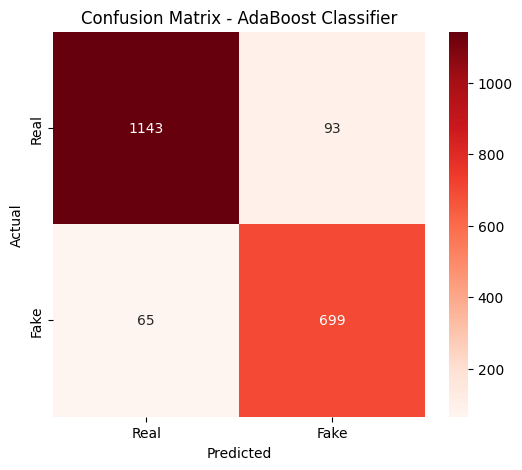

In [15]:

# Step 2: Import necessary libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Step 3: Train AdaBoost Classifier
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train_resampled, y_train_resampled)

# Step 4: Predict on training and test sets
y_pred_train = ada_model.predict(X_train_resampled)
y_pred_test = ada_model.predict(X_test)

# Step 5: Accuracy results
accuracy_train = accuracy_score(y_train_resampled, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

# Step 6: Print classification report
print("📊 Classification Report (Test Set):\n")
print(classification_report(y_test, y_pred_test))

# Step 7: Print accuracies
print("✅ Accuracy on Resampled Training Data :", round(accuracy_train * 100, 2), "%")
print("✅ Accuracy on Original Testing Data   :", round(accuracy_test * 100, 2), "%")

# Step 8: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.title('Confusion Matrix - AdaBoost Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


📊 Classification Report (Test Set):

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1236
           1       0.87      0.92      0.90       764

    accuracy                           0.92      2000
   macro avg       0.91      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000

✅ Accuracy on Resampled Training Data : 93.91 %
✅ Accuracy on Original Testing Data   : 91.95 %


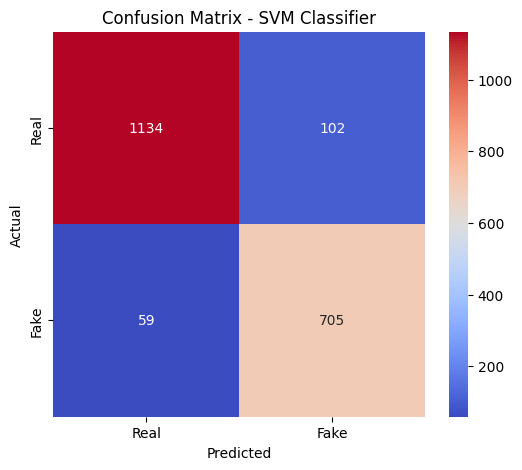

In [16]:


# Step 2: Import necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Step 3: Train SVM model (with RBF kernel)
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_resampled, y_train_resampled)

# Step 4: Predict on training and test sets
y_pred_train = svm_model.predict(X_train_resampled)
y_pred_test = svm_model.predict(X_test)

# Step 5: Accuracy results
accuracy_train = accuracy_score(y_train_resampled, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

# Step 6: Print classification report
print("📊 Classification Report (Test Set):\n")
print(classification_report(y_test, y_pred_test))

# Step 7: Print accuracies
print("✅ Accuracy on Resampled Training Data :", round(accuracy_train * 100, 2), "%")
print("✅ Accuracy on Original Testing Data   :", round(accuracy_test * 100, 2), "%")

# Step 8: Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.title('Confusion Matrix - SVM Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


📊 Classification Report (Test Set) - KNN:

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      1236
           1       0.86      0.90      0.88       764

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.91      0.90      0.90      2000

✅ Accuracy on Resampled Training Data (KNN): 95.1 %
✅ Accuracy on Original Testing Data (KNN): 90.45 %


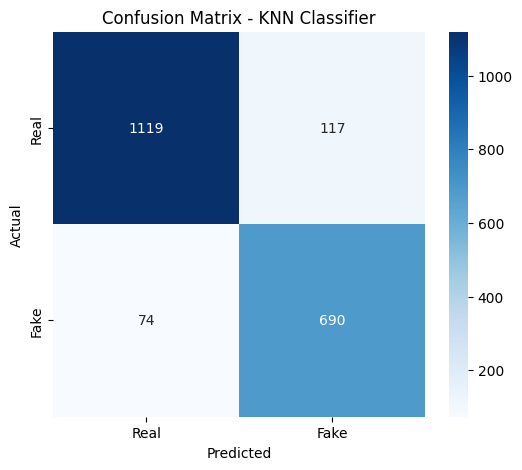

In [17]:
# Step 1: Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Train KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can tune n_neighbors
knn_model.fit(X_train_resampled, y_train_resampled)

# Step 3: Predict on training and test sets
y_pred_train_knn = knn_model.predict(X_train_resampled)
y_pred_test_knn = knn_model.predict(X_test)

# Step 4: Accuracy results
accuracy_train_knn = accuracy_score(y_train_resampled, y_pred_train_knn)
accuracy_test_knn = accuracy_score(y_test, y_pred_test_knn)

# Step 5: Print classification report
print("📊 Classification Report (Test Set) - KNN:\n")
print(classification_report(y_test, y_pred_test_knn))

# Step 6: Print accuracies
print("✅ Accuracy on Resampled Training Data (KNN):", round(accuracy_train_knn * 100, 2), "%")
print("✅ Accuracy on Original Testing Data (KNN):", round(accuracy_test_knn * 100, 2), "%")

# Step 7: Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_test_knn)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.title('Confusion Matrix - KNN Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


📊 Classification Report (Test Set) - Naive Bayes:

              precision    recall  f1-score   support

           0       0.95      0.90      0.93      1236
           1       0.85      0.93      0.89       764

    accuracy                           0.91      2000
   macro avg       0.90      0.92      0.91      2000
weighted avg       0.92      0.91      0.91      2000

✅ Accuracy on Resampled Training Data (Naive Bayes): 92.81 %
✅ Accuracy on Original Testing Data (Naive Bayes): 91.2 %


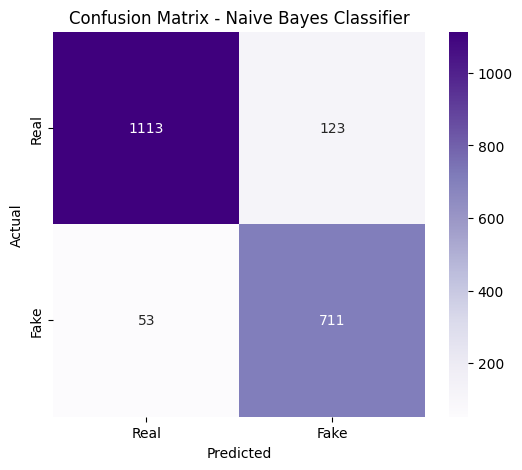

In [18]:
# Step 1: Import necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Train Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train_resampled, y_train_resampled)

# Step 3: Predict on training and test sets
y_pred_train_nb = nb_model.predict(X_train_resampled)
y_pred_test_nb = nb_model.predict(X_test)

# Step 4: Accuracy results
accuracy_train_nb = accuracy_score(y_train_resampled, y_pred_train_nb)
accuracy_test_nb = accuracy_score(y_test, y_pred_test_nb)

# Step 5: Print classification report
print("📊 Classification Report (Test Set) - Naive Bayes:\n")
print(classification_report(y_test, y_pred_test_nb))

# Step 6: Print accuracies
print("✅ Accuracy on Resampled Training Data (Naive Bayes):", round(accuracy_train_nb * 100, 2), "%")
print("✅ Accuracy on Original Testing Data (Naive Bayes):", round(accuracy_test_nb * 100, 2), "%")

# Step 7: Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_test_nb)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Purples', xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.title('Confusion Matrix - Naive Bayes Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


📊 Classification Report (Test Set) - MLP:

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1236
           1       0.88      0.91      0.89       764

    accuracy                           0.92      2000
   macro avg       0.91      0.92      0.91      2000
weighted avg       0.92      0.92      0.92      2000

✅ Accuracy on Resampled Training Data (MLP): 93.89 %
✅ Accuracy on Original Testing Data (MLP): 91.75 %


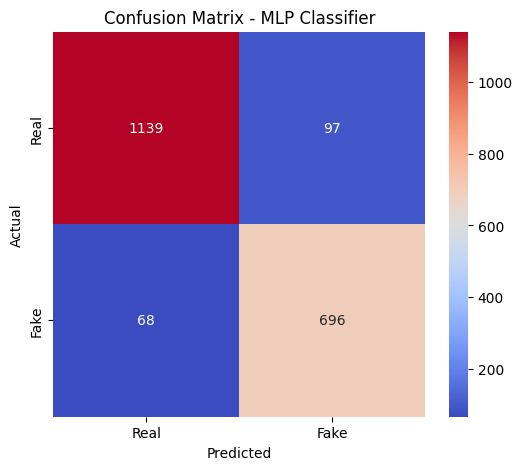

In [19]:
# Step 1: Import necessary libraries
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Train MLP Classifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)  # You can tune the hidden layers and max_iter
mlp_model.fit(X_train_resampled, y_train_resampled)

# Step 3: Predict on training and test sets
y_pred_train_mlp = mlp_model.predict(X_train_resampled)
y_pred_test_mlp = mlp_model.predict(X_test)

# Step 4: Accuracy results
accuracy_train_mlp = accuracy_score(y_train_resampled, y_pred_train_mlp)
accuracy_test_mlp = accuracy_score(y_test, y_pred_test_mlp)

# Step 5: Print classification report
print("📊 Classification Report (Test Set) - MLP:\n")
print(classification_report(y_test, y_pred_test_mlp))

# Step 6: Print accuracies
print("✅ Accuracy on Resampled Training Data (MLP):", round(accuracy_train_mlp * 100, 2), "%")
print("✅ Accuracy on Original Testing Data (MLP):", round(accuracy_test_mlp * 100, 2), "%")

# Step 7: Confusion Matrix
cm_mlp = confusion_matrix(y_test, y_pred_test_mlp)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='coolwarm', xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.title('Confusion Matrix - MLP Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


c:\Users\rushy\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [23:34:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4961, number of negative: 4961
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000082 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 777
[LightGBM] [Info] Number of data points in the train set: 9922, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


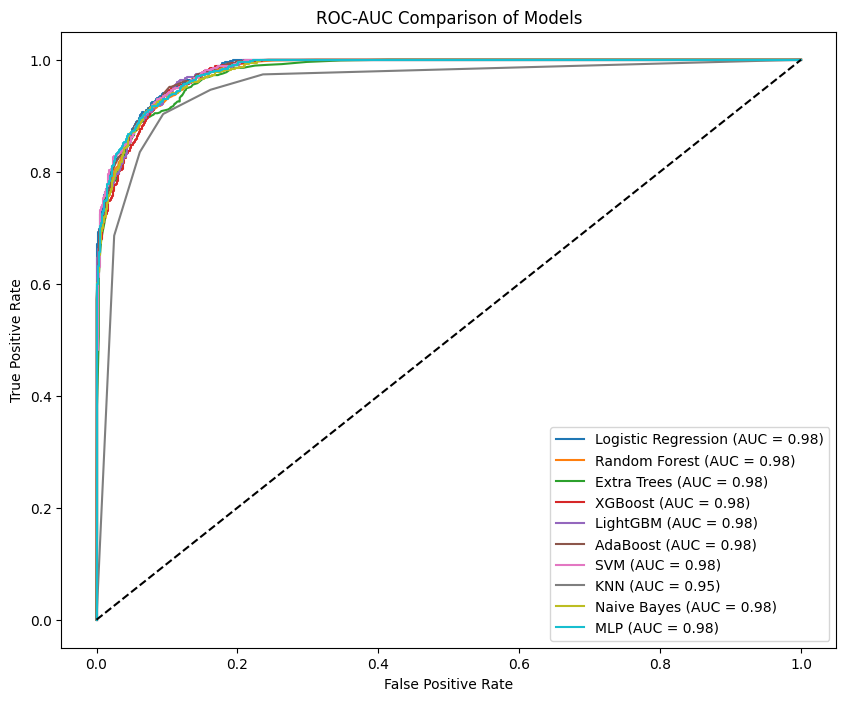

Model Performance Summary:
                     Accuracy   ROC-AUC
Logistic Regression    0.9225  0.982822
AdaBoost               0.9190  0.982124
SVM                    0.9195  0.981829
MLP                    0.9190  0.981338
LightGBM               0.9170  0.981008
Random Forest          0.9165  0.980245
Naive Bayes            0.9120  0.979978
XGBoost                0.9155  0.979835
Extra Trees            0.9140  0.976966
KNN                    0.9045  0.952435


In [20]:
# Step 1: Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "MLP": MLPClassifier(max_iter=300)
}

# Step 3: Initialize dictionary to store performance metrics
performance = {}

# Step 4: Train models and compute ROC-AUC and accuracy
plt.figure(figsize=(10, 8))
for model_name, model in models.items():
    # Train model
    model.fit(X_train_resampled, y_train_resampled)
    
    # Predict on test set
    y_pred_test = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # For ROC-AUC

    # Compute accuracy
    accuracy_test = accuracy_score(y_test, y_pred_test)

    # Compute ROC-AUC
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    # Store performance metrics
    performance[model_name] = {
        "Accuracy": accuracy_test,
        "ROC-AUC": roc_auc
    }

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

# Step 5: Finalize ROC curve plot
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.title('ROC-AUC Comparison of Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Step 6: Display performance table
performance_df = pd.DataFrame(performance).T.sort_values(by="ROC-AUC", ascending=False)
print("Model Performance Summary:")
print(performance_df)
